In [1]:
import pandas as pd
import numpy as np
from   pandas import Series, DataFrame
from   sklearn.metrics import classification_report
from   sklearn.linear_model import Perceptron
from   sklearn.model_selection import train_test_split
import sklearn.metrics
from   sklearn import preprocessing
import matplotlib.pyplot as plt
from   sklearn.metrics import roc_curve
from   sklearn.metrics import roc_auc_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import pickle

In [2]:
data = pd.read_excel("C:/Users/rafi/Python/kepadatan_penduduk_lengkap_2018.xlsx")

In [3]:
le = preprocessing.LabelEncoder()

In [4]:
data["status"]=le.fit_transform(data["status"])
data["guna_lahan"]=le.fit_transform(data["guna_lahan"])
data["sumber_air"]=le.fit_transform(data["sumber_air"])
data["klasifikasi"]=le.fit_transform(data["klasifikasi"])

In [5]:
X = data[['status','guna_lahan','sumber_air']] 
y = data.klasifikasi

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [7]:
clf = MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=(200,200,200), random_state=42,max_iter=1000)
clf.fit(X_train, y_train)           

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(200, 200, 200), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=42, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [8]:
predictions = clf.predict(X_test)

In [9]:
confusion_array = sklearn.metrics.confusion_matrix(y_test,predictions)
print(confusion_array)

[[32  5]
 [ 3 27]]


In [10]:
print('TN = ', confusion_array[0,0] ) # True Negative
print('FN = ', confusion_array[1,0] ) # False Negative
print('TP = ', confusion_array[1,1] ) # True Positive
print('FP = ', confusion_array[0,1] ) # False Positive

TN =  32
FN =  3
TP =  27
FP =  5


In [11]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.86      0.89        37
           1       0.84      0.90      0.87        30

    accuracy                           0.88        67
   macro avg       0.88      0.88      0.88        67
weighted avg       0.88      0.88      0.88        67



In [12]:
accuracy_score(y_test,predictions, normalize = True)

0.8805970149253731

In [13]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [14]:
auc = roc_auc_score(y_test, predictions)
print('AUC: %.2f' % auc)

AUC: 0.88


In [15]:
fpr, tpr, thresholds = roc_curve(y_test, predictions)

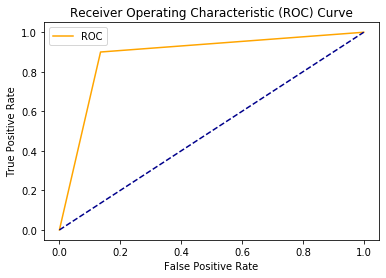

In [16]:
plot_roc_curve(fpr, tpr)

In [17]:
pickle.dump(clf, open('kebakaran.pkl','wb'))

In [18]:
data

,tahun,nama_provinsi,nama_kabupaten_kota,nama_kecamatan,nama_kelurahan,jumlah_luas_wilayah_(km2),jumlah_kepadatan_(jiwa/km2),status,guna_lahan,sumber_air,klasifikasi
0,2017,PROVINSI DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU UTR,P. PANGGANG,0.62,10858.0,1,5,2,1
1,2017,PROVINSI DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU UTR,P. KELAPA,2.58,2713.0,1,0,2,1
2,2017,PROVINSI DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU UTR,P. HARAPAN,2.45,1019.0,1,5,2,1
3,2017,PROVINSI DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU SLT,P. UNTUNG JAWA,1.03,2303.0,1,0,2,1
4,2017,PROVINSI DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU SLT,P. TIDUNG,1.07,5262.0,1,5,2,1
...,...,...,...,...,...,...,...,...,...,...,...
262,2017,PROVINSI DKI JAKARTA,JAKARTA TIMUR,CIPAYUNG,MUNJUL,1.90,13776.0,1,15,4,0
263,2017,PROVINSI DKI JAKARTA,JAKARTA TIMUR,CIPAYUNG,SETU,3.25,6725.0,1,15,4,0
264,2017,PROVINSI DKI JAKARTA,JAKARTA TIMUR,CIPAYUNG,BAMBU APUS,3.17,9147.0,1,15,4,0
265,2017,PROVINSI DKI JAKARTA,JAKARTA TIMUR,CIPAYUNG,LUBANG BUAYA,3.72,19177.0,1,15,4,0


In [19]:
data [140:150]

,tahun,nama_provinsi,nama_kabupaten_kota,nama_kecamatan,nama_kelurahan,jumlah_luas_wilayah_(km2),jumlah_kepadatan_(jiwa/km2),status,guna_lahan,sumber_air,klasifikasi
140,2017,PROVINSI DKI JAKARTA,JAKARTA SELATAN,TEBET,KEBON BARU,1.29,32351.0,1,17,4,0
141,2017,PROVINSI DKI JAKARTA,JAKARTA SELATAN,TEBET,BUKIT DURI,1.07,38780.0,1,17,4,0
142,2017,PROVINSI DKI JAKARTA,JAKARTA SELATAN,TEBET,MANGGARAI SELATAN,0.51,52980.0,1,17,4,0
143,2017,PROVINSI DKI JAKARTA,JAKARTA SELATAN,TEBET,MANGGARAI,0.95,35884.0,1,18,2,0
144,2017,PROVINSI DKI JAKARTA,JAKARTA SELATAN,SETIA BUDI,SETIA BUDI,0.74,4812.0,1,21,4,1
145,2017,PROVINSI DKI JAKARTA,JAKARTA SELATAN,SETIA BUDI,KARET SEMANGGI,0.90,3383.0,1,18,4,0
146,2017,PROVINSI DKI JAKARTA,JAKARTA SELATAN,SETIA BUDI,KARET KUNINGAN,1.79,10469.0,1,13,4,1
147,2017,PROVINSI DKI JAKARTA,JAKARTA SELATAN,SETIA BUDI,KARET,0.94,12349.0,1,10,4,1
148,2017,PROVINSI DKI JAKARTA,JAKARTA SELATAN,SETIA BUDI,MENTENG ATAS,0.90,36179.0,1,17,4,0
149,2017,PROVINSI DKI JAKARTA,JAKARTA SELATAN,SETIA BUDI,PASAR MANGGIS,0.78,40727.0,1,17,4,0


In [20]:
print (y_test)

84     1
46     0
183    0
236    0
177    0
      ..
67     1
77     1
18     0
196    0
242    1
Name: klasifikasi, Length: 67, dtype: int32


In [21]:
print (y_train)

68     0
217    1
159    0
55     1
186    1
      ..
20     1
188    1
71     0
106    0
102    1
Name: klasifikasi, Length: 200, dtype: int32
